# Rabbits and Foxes

I am running this in Python 2 at the moment becuause matplotlib is not working in my conda install of python 3.

# Euler's Method

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initial conditions and values needed for the entire problem

k_1 = 0.015 # day^-1
k_2 = 0.00004 # day^-1 foxes^-1
k_3 = 0.0004 # day^-1 rabbits^-1
k_4 = 0.04 # day^-1

t_final = 600 # days
R_i = 400
F_i = 200


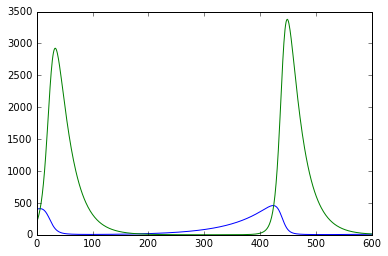

In [3]:
# Euler's method

i = 0
R = [0]
F = [0]
R[0] = R_i
F[0] = F_i
t = 0
time = [0]
while t < t_final:
    del_t = 1 # day
    R.append(R[i] + del_t*(k_1 * R[i] - k_2 * R[i] * F[i]))
    F.append(F[i] + del_t*(k_3 * R[i] * F[i] - k_4 * F[i]))
    i += 1
    t += del_t
    time.append(t)

plt.plot(time, R)
plt.plot(time, F)

# ODEINT Method

In [4]:
from scipy.integrate import odeint

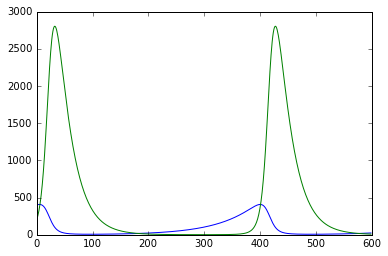

In [5]:
population = []
conditions = [R_i, F_i]
t = np.array(range(t_final))

def pop(y, t):
    R, F = y
    del_R = k_1 * R - k_2 * R * F
    del_F = k_3 * R * F - k_4 * F
    return del_R, del_F

population = odeint(pop, conditions, t)

R_pop = population[:,0]
F_pop = population[:,1]

plt.plot(t, R_pop)
plt.plot(t, F_pop)

# Kinetic Monte Carlo Method

In [8]:
"""
A series of functions to define the birth and / or death of a rabbit (R) or fox (F)
"""
import random
from math import log as ln
def R_birth(R,F):
    return k_1 * R
def R_death(R,F):
    return k_2 * R * F
def F_birth(R,F):
    return k_3 * R * F
def F_death(R,F):
    return k_4 * F

In [9]:
t = 0
i = 0
rabbits = []
foxes = []
time = []

rabbits.append(R_i)
foxes.append(F_i)
i = 0


while t < t_final:
    
    r = rabbits[-1]
    f = foxes[-1]
    R_b = R_birth(r,f)
    R_d = R_death(r,f)
    F_b = F_birth(r,f)
    F_d = F_death(r,f)
    
    sum_rates = R_b + R_d + F_b + F_d
    uQ = random.uniform(0.000001, 1) * sum_rates
    
    if uQ <= R_b:
        rabbits.append(r + 1)
        foxes.append(f)
    elif R_b < uQ <= R_b + R_d:
        rabbits.append(r - 1)
        foxes.append(f)
    elif R_b + R_d < uQ <= R_b + R_d + F_b:
        rabbits.append(r)
        foxes.append(f + 1)
    elif R_b + R_d + F_b < uQ <= R_b + R_d + F_b + F_d:
        rabbits.append(r)
        foxes.append(f - 1)
        
    
    del_t = (sum_rates ** -1) * ln(1/random.uniform(0.000001, 1))
    time.append(t + del_t)


print len(time)
print len(rabbits)

        

KeyboardInterrupt: 

In [11]:
len(time)

26463248

In [12]:
len(rabbits)

26463249

In [13]:
rabbits.pop(-1)

26396238

4.446058819111739